# Importanto bibliotecas

In [4]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt 
import mplcyberpunk
import win32com.client as win32

# Pegando dados no Yahoo Finance

In [6]:
codigos_de_negociacao = ['^BVSP', 'BRL=X']

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365) # Faz a difença do dia atual e 365 dias

dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)

dados_mercado

[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-02-07    5.3269  111996.0  5.3269  111996.0  5.3430  112517.0  5.276800   
2022-02-08    5.2626  112234.0  5.2626  112234.0  5.2849  112251.0  5.251000   
2022-02-09    5.2584  112461.0  5.2584  112461.0  5.2880  113163.0  5.232774   
2022-02-10    5.2345  113359.0  5.2345  113359.0  5.2446  113812.0  5.170000   
2022-02-11    5.2487  113572.0  5.2487  113572.0  5.2512  114899.0  5.182800   
...              ...       ...     ...       ...     ...       ...       ...   
2023-01-30    5.1072  111888.0  5.1072  111888.0  5.1224  112920.0  5.081096   
2023-01-31    5.1149  113532.0  5.1149  113532.0  5.1337  113581.0  5.077500   
2023-02-01    5.0722  112303.0  5.0722  112303.0  5.0868  113598.0  5.047900   
2023-02-02    5.0535  109935.0  5.0535  109935.0  5.0545  112943.0  4.941700   
2023-02-03    5.0492  108490.0  5.0492  108490.0  5.1347  110570.0  5.046758   

                          Open           Volume              
               ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                         
2022-02-07  111490.0  5.326200  112247.0      0  10672800.0  
2022-02-08  110943.0  5.262800  111995.0      0  10157500.0  
2022-02-09  111710.0  5.256489  112233.0      0  13794500.0  
2022-02-10  112163.0  5.231429  112462.0      0  13267900.0  
2022-02-11  113128.0  5.248600  113368.0      0  18602800.0  
...              ...       ...       ...    ...         ...  
2023-01-30  111824.0  5.107200  112319.0      0  11272700.0  
2023-01-31  112145.0  5.114900  112273.0      0  12900200.0  
2023-02-01  110729.0  5.072200  113430.0      0  17821500.0  
2023-02-02  109747.0  5.053500  112072.0      0  15241800.0  
2023-02-03  108185.0  5.049200  110141.0      0  13235300.0  

[260 rows x 12 columns]

## Manipulando os dados - Seleção e exclusão de dados

In [8]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()
dados_fechamento

,dolar,ibovespa
Date,,
2022-02-07,5.3269,111996.0
2022-02-08,5.2626,112234.0
2022-02-09,5.2584,112461.0
2022-02-10,5.2345,113359.0
2022-02-11,5.2487,113572.0
...,...,...
2023-01-30,5.1072,111888.0
2023-01-31,5.1149,113532.0
2023-02-01,5.0722,112303.0


## Manipulando os dados - Criando tabelas com outros timeframes

In [12]:
dados_mensais = dados_fechamento.resample('M').last() # Fechamento mensal
dados_anuais = dados_fechamento.resample('Y').last() # Fechamento anual

display(dados_mensais, dados_anuais)

,dolar,ibovespa
Date,,
2022-02-28,5.1222,113142.0
2022-03-31,4.7697,119999.0
2022-04-30,4.9378,107876.0
2022-05-31,4.7524,111351.0
2022-06-30,5.1809,98542.0
2022-07-31,5.1827,103165.0
2022-08-31,5.1219,109523.0
2022-09-30,5.3962,110037.0
2022-10-31,5.2885,116037.0


,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0492,108490.0


# Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos

In [18]:
retorno_diario = dados_fechamento.pct_change().dropna()
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()

display(retorno_diario, retorno_mensal, retorno_anual)

,dolar,ibovespa
Date,,
2022-02-08,-0.012071,0.002125
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
...,...,...
2023-01-30,0.008781,-0.005458
2023-01-31,0.001508,0.014693
2023-02-01,-0.008348,-0.010825


,dolar,ibovespa
Date,,
2022-03-31,-0.068818,0.060605
2022-04-30,0.035243,-0.101026
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602


,dolar,ibovespa
Date,,
2023-12-31,-0.041315,-0.014005


# Localizar o fechamento do dia anterior, retorno no mês e retorno no ano
- loc -> referenciar elementos a partir do nome
- iloc -> selecionar elementos como uma matriz

In [27]:
retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibovespa = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_diario.iloc[-1, 0]
retorno_mensal_ibovespa = retorno_diario.iloc[-1, 1]

retorno_anual_dolar = retorno_diario.iloc[-1, 0]
retorno_anual_ibovespa = retorno_diario.iloc[-1, 1]

print('DIARIO')
display(retorno_diario_dolar, retorno_diario_ibovespa)
print('MENSAL')
display(retorno_mensal_dolar, retorno_mensal_ibovespa)
print('ANUAL')
display(retorno_anual_dolar, retorno_anual_ibovespa)

DIARIO


-0.0008509186392321455

-0.013144130622640637

MENSAL


-0.0008509186392321455

-0.013144130622640637

ANUAL


-0.0008509186392321455

-0.013144130622640637

In [28]:
# Transformando os dados em porcentagem
retorno_diario_dolar = round(retorno_diario_dolar * 100, 2)
retorno_diario_ibovespa = round(retorno_diario_ibovespa * 100, 2)

retorno_mensal_dolar = round(retorno_mensal_dolar * 100, 2)
retorno_mensal_ibovespa = round(retorno_mensal_ibovespa * 100, 2)

retorno_anual_dolar = round(retorno_anual_dolar * 100, 2)
retorno_anual_ibovespa = round(retorno_anual_ibovespa * 100, 2)

# Fazer os gráficos da performance dos ativos

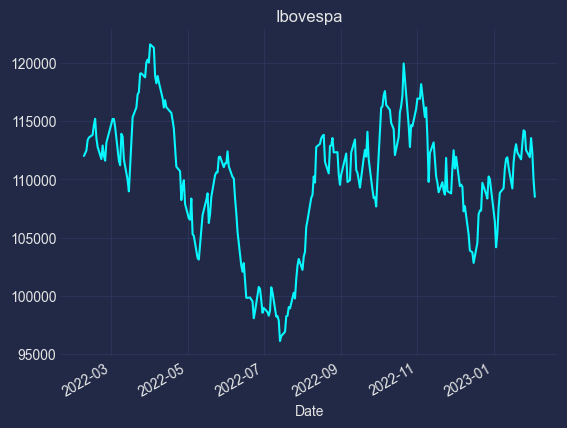

In [33]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)
plt.title('Ibovespa')
plt.savefig('ibovespa.png', dpi = 300)

plt.show()


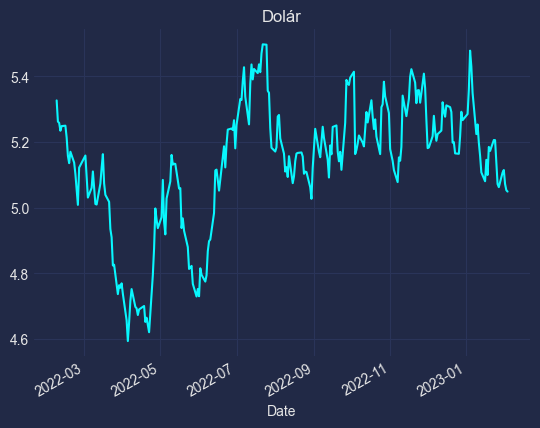

In [34]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)
plt.title('Dolár')
plt.savefig('dolar.png', dpi = 300)

plt.show()

# Enviar relatório por e-mail

In [39]:
outlook = win32.Dispatch('outlook.application')

email = outlook.CreateItem(0)

In [44]:
email.To = 'migskawakami@gmail.com'
email.Subject = f'Relatório {datetime.datetime.now()}'
email.Body = f''' Salve, Miguel! Segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibovespa}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_diario_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_diario_dolar}%.


Abs,

O melhor estagiário do mundo
'''

anexo_ibovespa = r'C:\Users\migsk\Documents\Bot.Camp - Varos\Aula 01 - Relatório de fechamento de mercado por e-mail\ibovespa.png'
anexo_dolar = r'C:\Users\migsk\Documents\Bot.Camp - Varos\Aula 01 - Relatório de fechamento de mercado por e-mail\dolar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()